<a href="https://colab.research.google.com/github/SridharK12/Deep-Learning-Project/blob/main/Quora_Spam_Filter_Trained_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(tf.__version__)
from google.colab import drive
drive.mount('/content/drive')  

2.8.0
Mounted at /content/drive


In [ ]:
vocab_size = 50000     #Number of unique words in vocabulary
embedding_dim = 64     #Dimensionality of embedding
max_length = 249       #maximum length of the data record. Only first 200 characters will be considered by the ealgorithms
trunc_type = 'post'    #When the truncation type is post characters to the end of text are truncated whenever the length reaches max length
padding_type = 'post'  #When the truncation type is pre initial characters are deleted when length of text exceeds max length 
oov_tok = '<OOV>'      #This is out of vocabulary token
training_portion = .8

In [ ]:
data = pd.read_csv("/content/drive/My Drive/quora_train.csv",encoding='iso-8859-1')

In [ ]:
data.shape

(1306122, 3)

In [ ]:
data_sample=data.sample(frac=0.3)

In [ ]:
data_sample.shape

(391837, 3)

In [ ]:
data_sample["target"].value_counts()

0    367267
1     24570
Name: target, dtype: int64

In [ ]:
24159/367678

0.06570695010307932

In [ ]:
data_bkp=data
data=data_sample
#30 percent of the data is used for the algorithm to reduce the run time

In [ ]:
#data.head(20)

In [ ]:
#data['text_length']=data['question_text'].str.len()

In [ ]:
data.head()

,qid,question_text,target
1083534,d45645915a3cf4be891b,Which is the best location for luxury weddings...,0
564499,6e98e6c83f0ddc56c66a,What are your thoughts about Indonesian presid...,0
1205821,ec59bea1e4a93eac5ffc,What is the story of Muhoozi Kainerugaba?,0
206738,286dc92cc0e347d0c938,What is ApkExtension.com?,0
1196075,ea6c4bf0d03905ca9bd0,How would Itachi react to Sarada's existence? ...,0


In [ ]:
#data['text_length'].max()

In [ ]:
#data['text_length'].value_counts()

In [ ]:
data.shape

(391837, 3)

In [ ]:
data.describe()

,target
count,391837.000000
mean,0.062705
std,0.242431
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
duplicatedRow = data[data.duplicated()]

In [ ]:
duplicatedRow.head()

,qid,question_text,target


In [ ]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [ ]:

spam = data[data.target ==1]
non_spam = data[data.target==0]

In [ ]:
# Create numpy list to visualize using wordcloud
spam_text = " ".join(spam.question_text.to_numpy().tolist())
non_spam_text = " ".join(non_spam.question_text.to_numpy().tolist())

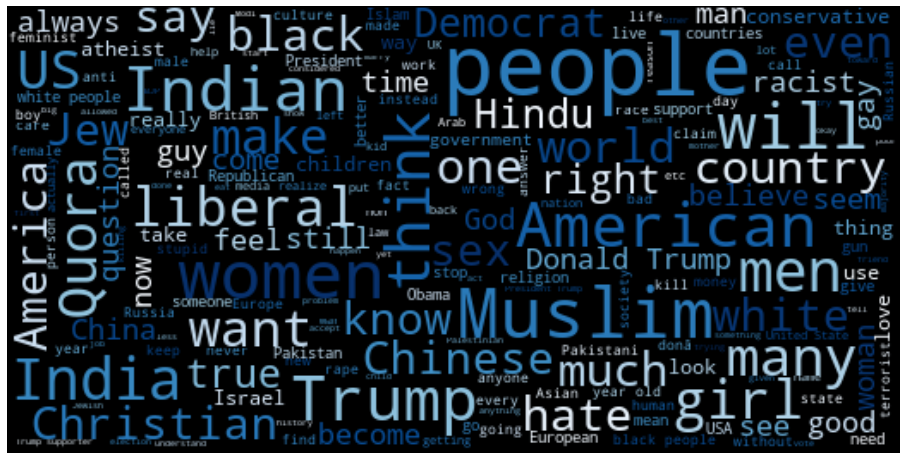

In [ ]:
spam_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

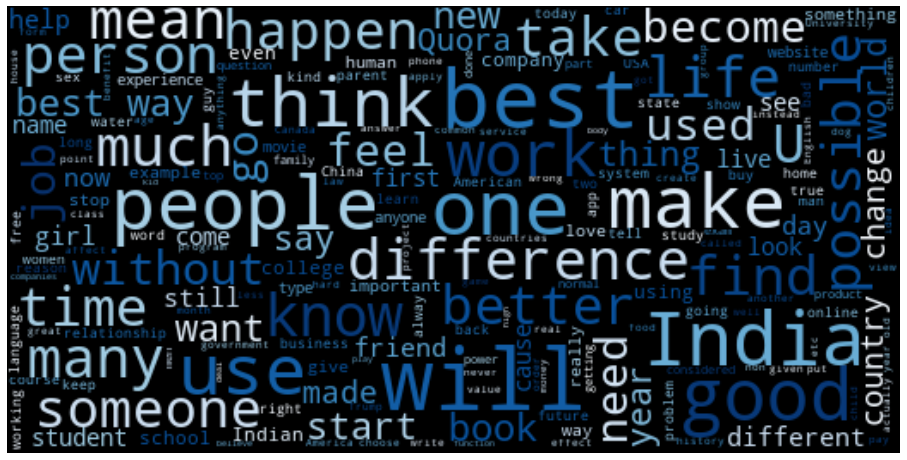

In [ ]:
non_spam_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(non_spam_text)
plt.figure(figsize=(16,10))
plt.imshow(non_spam_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [ ]:
data["target"].value_counts()

0    367267
1     24570
Name: target, dtype: int64

In [ ]:
# This code is for down sampling the majority class. However we are not doing down sampling as of now
#ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
#spam_msg_df = spam_msg
#print(ham_msg_df.shape, spam_msg_df.shape)

In [ ]:
#data_bkp=data
#data1=data.drop(['qid'], axis = 1)

In [ ]:
target_con = data['target'].values

In [ ]:
#Consolidating the target 
target_con

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test, train_target, test_target = train_test_split(data["question_text"], target_con, test_size = 0.2,random_state=2)

In [ ]:
df_train.head()

210201     Will I get BDS seat if my expected score is 300?
486310                     How can I improve the willpower?
939521    Why don't we just gather up all of the flat ea...
906053    Explain why the assay of tartaric acid falls u...
480755       Have you ever invested in a company on a whim?
Name: question_text, dtype: object

In [ ]:
df_test.head()

828706                                What are barr bodies?
429880    Which companies are hiring freshers as UI deve...
927012    Do you think the ring of fire helped keep Gand...
277043    How can Allah's 'final revelation' to the worl...
762980    How can I calculate the calories in barbecue r...
Name: question_text, dtype: object

In [ ]:
train_target

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
test_target

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(df_train)


In [ ]:
#word_index=tokenizer.word_index
#word_index

In [ ]:
#tot_words = len(word_index)
#print('There are %s unique tokens in training data. ' % tot_words)

In [ ]:
training_sequences = tokenizer.texts_to_sequences(df_train)


In [ ]:
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type )


In [ ]:
training_padded.shape

(313469, 249)

In [ ]:
training_padded.shape[1]

249

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(df_test)


In [ ]:
testing_sequences = tokenizer.texts_to_sequences(df_test)


In [ ]:
testing_padded = pad_sequences(testing_sequences, maxlen = max_length,padding = padding_type, truncating = trunc_type)

In [ ]:
testing_padded.shape

(78368, 249)

In [ ]:
testing_padded.shape[1]

249

In [ ]:
word_index = tokenizer.word_index

In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip

--2022-03-08 16:19:27--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2022-03-08 16:19:27--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2022-03-08 16:19:27--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Sav

In [ ]:
!unzip glove*.zip
!ls glove*

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      
glove.42B.300d.txt  glove.42B.300d.zip


In [ ]:
#!ls glove
#!pwd

ls: cannot access 'glove': No such file or directory


In [ ]:
!unzip glove.42B.300d.zip

Archive:  glove.42B.300d.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.42B.300d.zip or
        glove.42B.300d.zip.zip, and cannot find glove.42B.300d.zip.ZIP, period.


In [ ]:
#!ls glove*

In [ ]:
%%time
embedding_vectors = {}
# with open('/kaggle/input/glove6b100d/glove.6B.100d.txt','r',encoding='utf-8') as file:
with open('glove.42B.300d.txt','r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
print(f"Size of vocabulary in GloVe: {len(embedding_vectors)}")   


Size of vocabulary in GloVe: 1917494
CPU times: user 3min 9s, sys: 7.4 s, total: 3min 17s
Wall time: 3min 17s


In [ ]:
list(embedding_vectors.items())[:1]

[(',', array([ 1.8378e-01, -1.2123e-01, -1.1987e-01,  1.5227e-02, -1.9121e-01,
         -6.6074e-02, -2.9876e+00,  8.0795e-01,  6.7338e-02, -1.3184e-01,
         -5.2740e-01,  4.4521e-01,  1.2982e-01, -2.1823e-01, -4.5080e-01,
         -2.2478e-01, -3.0766e-01, -1.1137e-01, -1.6200e-01, -2.1294e-01,
         -4.6022e-01, -8.6593e-02, -2.4902e-01,  4.6729e-01, -6.0230e-01,
         -4.4972e-01,  4.3946e-01,  1.4738e-02,  2.7498e-01, -7.8421e-02,
          3.6009e-01,  1.2172e-01,  4.2980e-01, -5.5345e-02,  4.4950e-01,
         -7.4444e-01, -2.6702e-01,  1.6431e-01, -1.9335e-01,  1.3468e-01,
          2.8870e-01,  2.3924e-01, -2.3579e-01, -2.8972e-01,  2.0149e-01,
          4.8135e-02, -1.8322e-01, -1.5492e-01, -1.9255e-01,  4.0271e-01,
          1.6051e-01,  1.7721e-01,  3.2557e-01,  1.1625e-02, -4.2572e-01,
          3.4205e-01, -4.5865e-01, -2.4860e-01,  3.4128e-02,  3.3060e-02,
         -5.7065e-02,  1.8136e-01, -4.3638e-01,  5.7090e-04, -1.1935e-01,
         -2.1950e-01,  1.6429e-01

In [ ]:
max_words=50000

In [ ]:
#initialize the embedding_matrix with zeros
emb_dim = 300
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_count += 1 
            oov_words.append(word)
#print some of the out of vocabulary words
print(f'Some out of valubulary words: {oov_words[0:5]}')

Some out of valubulary words: ['<OOV>', "isn't", 'iâ\x80\x99m', "aren't", 'donâ\x80\x99t']


In [ ]:
#LSTM hyperparameters
n_lstm = 128
drop_lstm =0.2

In [ ]:
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [ ]:
#LSTM Spam detection architecture
#model1 = Sequential()
#model1.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
#model1.add(LSTM(n_lstm))
#model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
#model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
#model1.add(Dense(2, activation='sigmoid'))

In [ ]:
#LSTM Spam detection architecture
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model1.add(LSTM(n_lstm))
#model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
#model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 249, 64)           3200000   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,298,945
Trainable params: 3,298,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
train_target.shape

(1044897,)

In [ ]:
training_padded.shape

(1044897, 249)

In [ ]:
test_target.shape

(261225,)

In [ ]:
testing_padded.shape

(261225, 249)

In [ ]:
num_epochs = 10
##early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, train_target, epochs=num_epochs, validation_data=(testing_padded, test_target), verbose=2)

Epoch 1/10
9796/9796 - 3088s - loss: 0.2344 - accuracy: 0.9376 - val_loss: 0.2372 - val_accuracy: 0.9363 - 3088s/epoch - 315ms/step
Epoch 2/10
9796/9796 - 3110s - loss: 0.2339 - accuracy: 0.9376 - val_loss: 0.2372 - val_accuracy: 0.9363 - 3110s/epoch - 317ms/step
Epoch 3/10
9796/9796 - 3009s - loss: 0.2339 - accuracy: 0.9376 - val_loss: 0.2372 - val_accuracy: 0.9363 - 3009s/epoch - 307ms/step
Epoch 4/10
9796/9796 - 2968s - loss: 0.2339 - accuracy: 0.9376 - val_loss: 0.2374 - val_accuracy: 0.9363 - 2968s/epoch - 303ms/step
Epoch 5/10


KeyboardInterrupt: ignored

In [ ]:
#tf.keras.utils.plot_model(model1)